In [2]:
import numpy as np
import matplotlib.pyplot as pp
import pandas as pd
import seaborn

# Interagency Grizzly Bear Study Team - Yellowstone Grizzly Bear Investigations

All of this data is from the <a href="https://igbconline.org/grizzly-bear-study-team/">Interagency Grizzly Bear Study Team (IGBST)</a>. These annual reports are summaries are the results of grizzly bear research and monitoring in the Great Yellowstone Ecosystem (GYE) by the Interagency Grizzly Bear Study Team. The annual reports start in 1997 and the most recently published report the investigation from 2022.

The first step of analyzing this data was taking screen shots of the tables found in "Bear Monitoring and Population Trend" specifically Table 1 and Table 3. Table 1 highlights all of the grizzly bears captured in the GYE for that year and consists of the bear's identification, sex, age, date it was captured, general location of the capture, capture, type, relase site, and which organization handled the capture. Table 3 highlights all of the bears radiomonitored, any offspring of note, and whether the radiomonitor is still opporational. To populate a data set I first needed to get the data into a csv file. I did this by taking screenshots of the table and using Excel to export the data from the screenshots. There was some manual cleanup and verifcation that needed to happen in Excel before being able to export it to a csv and explore the data more. This was a tedious process and was only done becuase I could not find an already available csv file of all the data that was included in the tables. I found that as the years went on Excel had a harder time converting the pictures of the tables to usable data so there was a lot of manual entry. Becuase of this there is clearly some room for human error, both on my side and becuase of the change of naming conventions in the data set. Most of this will be identified in the data exploration phase and get cleaned up in the data cleansing phase. 

Some of the basic cleanup done in Excel includes:
- Making sure Excel imports the data correctly from the images
- Making sure naming conventions are kept
    - 2018 IGBST uses the form *Removed (#209090)* for the **Release Site** column which is not used anywhere else. In fact there is no removal number after 2017
    - Sometimes the hyphen gets lost in *PY-WY*

The CSV files in this folder is the result of that initial cleanup.

## Data Exploration

First step is to explore our data set. First up the capture data from 2022-1997.

In [3]:
bearCapture = pd.read_csv('Bears.csv')
bearCapture

,Bear,Sex,Age,Date,General locationa,Capture type,Release Site,Handler,Year
0,1050,Male,Adult,4/25/22,"Greybull River, PR-WY",Management,Removed (202203),WGFD,2022
1,1059,Male,Adult,5/4/22,"South Fork Shoshone, PR-WY",Management,Transported,WGFD,2022
2,1060,Male,Adult,5/21/22,"Beam Gulch, SNF",Research,On site,WGFD,2022
3,1061,Male,Adult,5/21/22,"Gravelbar crk, SNF",Research,On site,WGFD,2022
4,1061,Male,Adult,5/29/22,"Gravelbar crk, SNF",Research,On site,WGFD,2022
...,...,...,...,...,...,...,...,...,...
657,789,Male,Adult,10/20/17,"Snake River, GTNP",Research,On site,GTNP,2017
658,772,Male,Adult,10/25/17,"North Fork Shoshone, SNF",Management,On site,WGFD,2017
659,Unm11,Female,Subadult,10/25/17,"Aspen Crk, SNF",Management,Removed (201743),WGFD,2017
660,542,Male,Adult,11/2/17,"Carter Crk, PR-WY",Management,Removed (201751),WGFD,2017


In [4]:
bearCapture.columns

Index(['Bear', 'Sex', 'Age', ' Date ', 'General locationa', 'Capture type',
       'Release Site', 'Handler', 'Year'],
      dtype='object')

In [5]:
bearCapture.isna().sum()

Bear                 0
Sex                  0
Age                  0
 Date                0
General locationa    1
Capture type         0
Release Site         0
Handler              1
Year                 0
dtype: int64

array([[<AxesSubplot:title={'center':'Year'}>]], dtype=object)

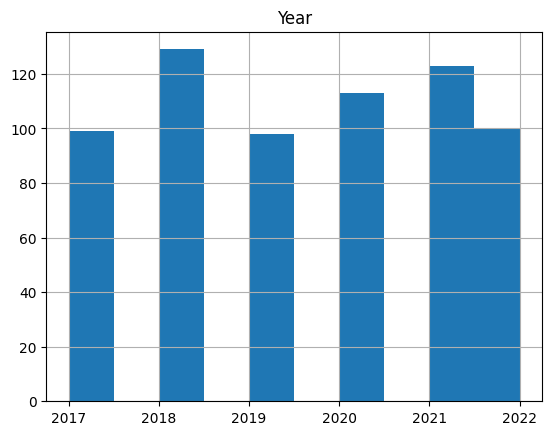

In [8]:
bearCapture.hist() #Shows amount of bears captured each year

In [21]:
pd.DataFrame(bearCapture['General locationa'].value_counts())

,General locationa
"Henrys Fork, CTNF",32
"Snake River, GTNP",18
"Greybull River, PR-WY",15
"South Fork Shoshone, PR-WY",14
"Wagon crk, BTNF",13
...,...
"Tom Miner crk, PR-MT",1
"Leidy crk, BTNF",1
"North Fork Spread Crk, BTNF",1
"Grouse crk, BTNF",1


In [26]:
bearCapture[bearCapture['General locationa']=='Carter crk, PR-WY'] # This should be replaces to have a Crk

,Bear,Sex,Age,Date,General locationa,Capture type,Release Site,Handler,Year
337,944,Male,Subadult,4/16/19,"Carter crk, PR-WY",Management,Removed (201904),WGFD,2019
339,Unm201901,Male,Subadult,5/11/19,"Carter crk, PR-WY",Management,Removed (201908),WGFD,2019
572,886,Female,Subadult,5/22/17,"Carter crk, PR-WY",Management,Transport,WGFD,2017


<AxesSubplot:>

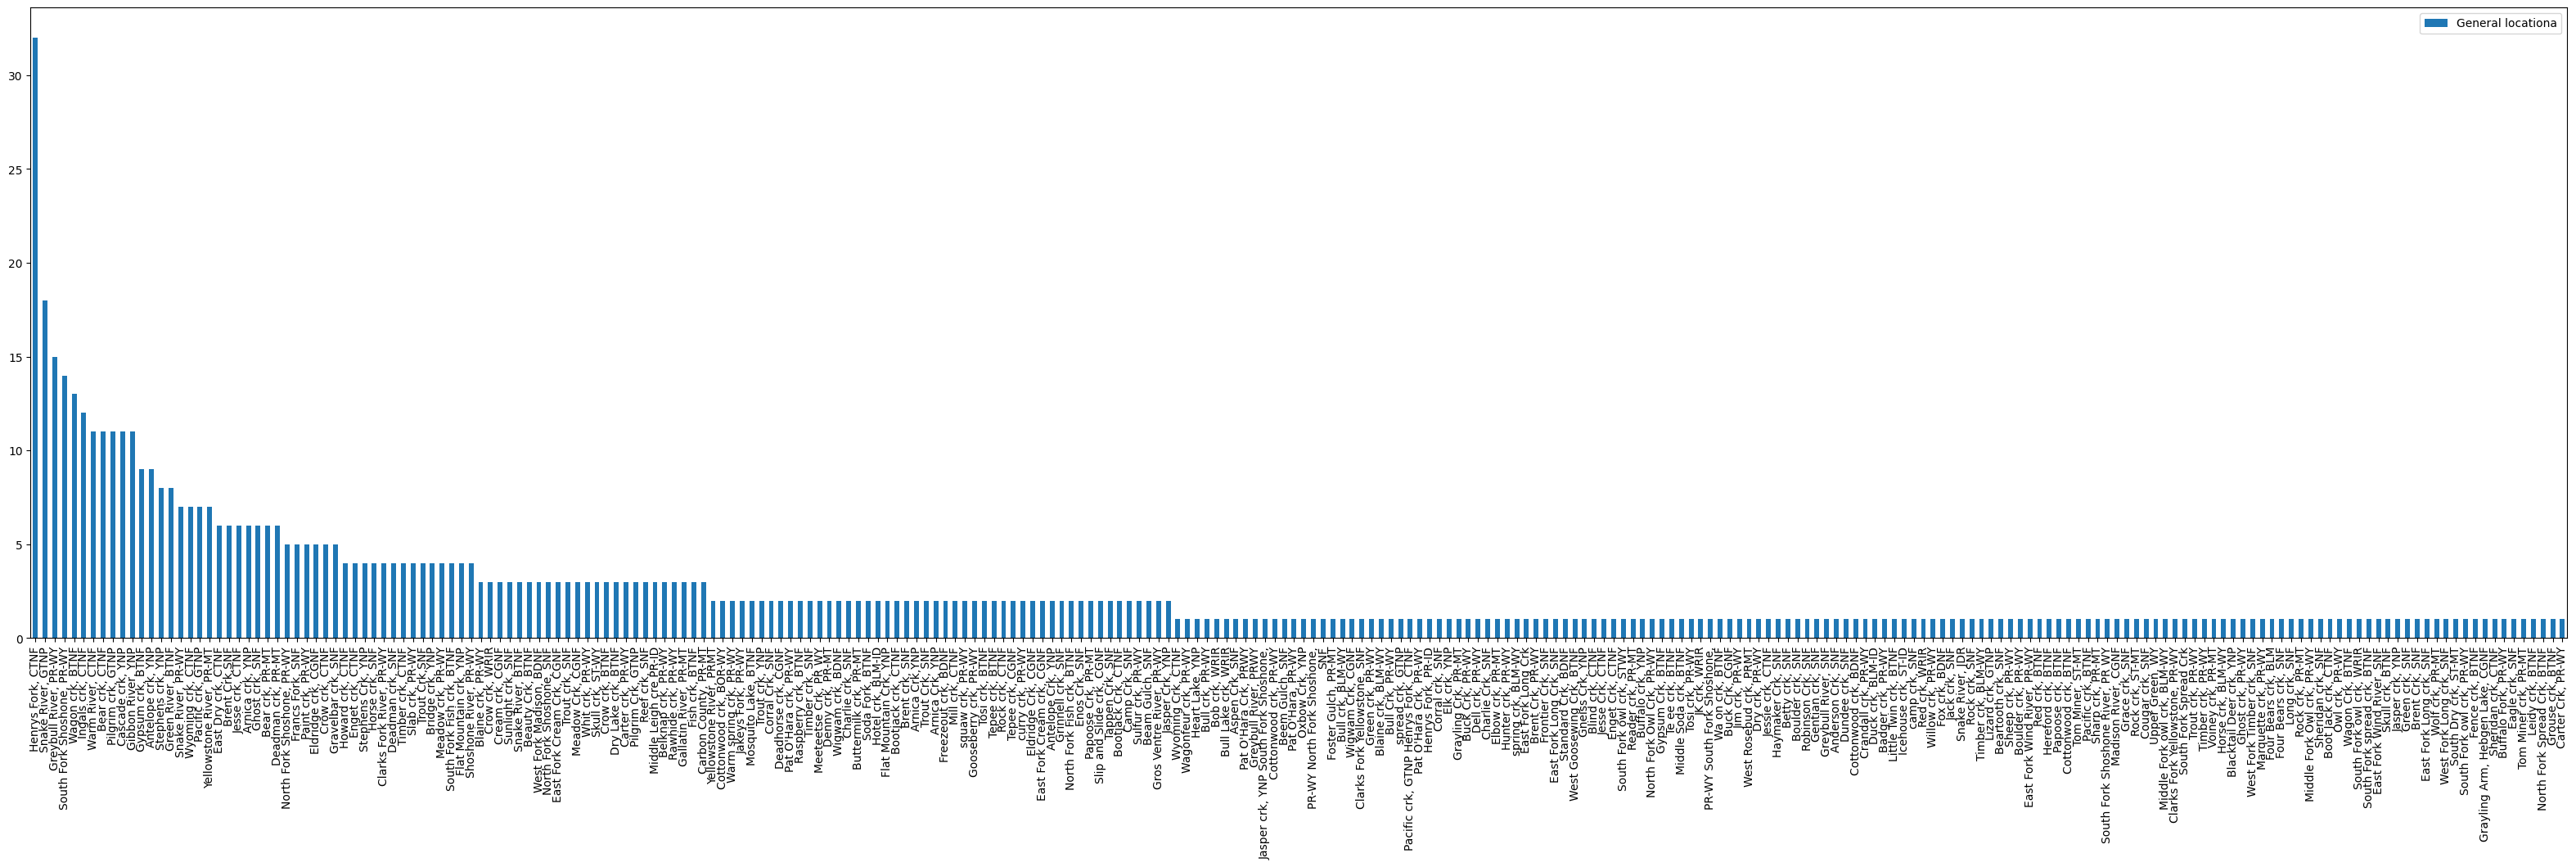

In [9]:
pd.DataFrame(bearCapture['General locationa'].value_counts()).plot(kind='bar', figsize=(40,10))

There are a lot of different locations and some of them are because of differences in naming convetions, i.e. crk vs CRK. This should be cleaned up especially since there are places that have only one or two bear captures.

<AxesSubplot:>

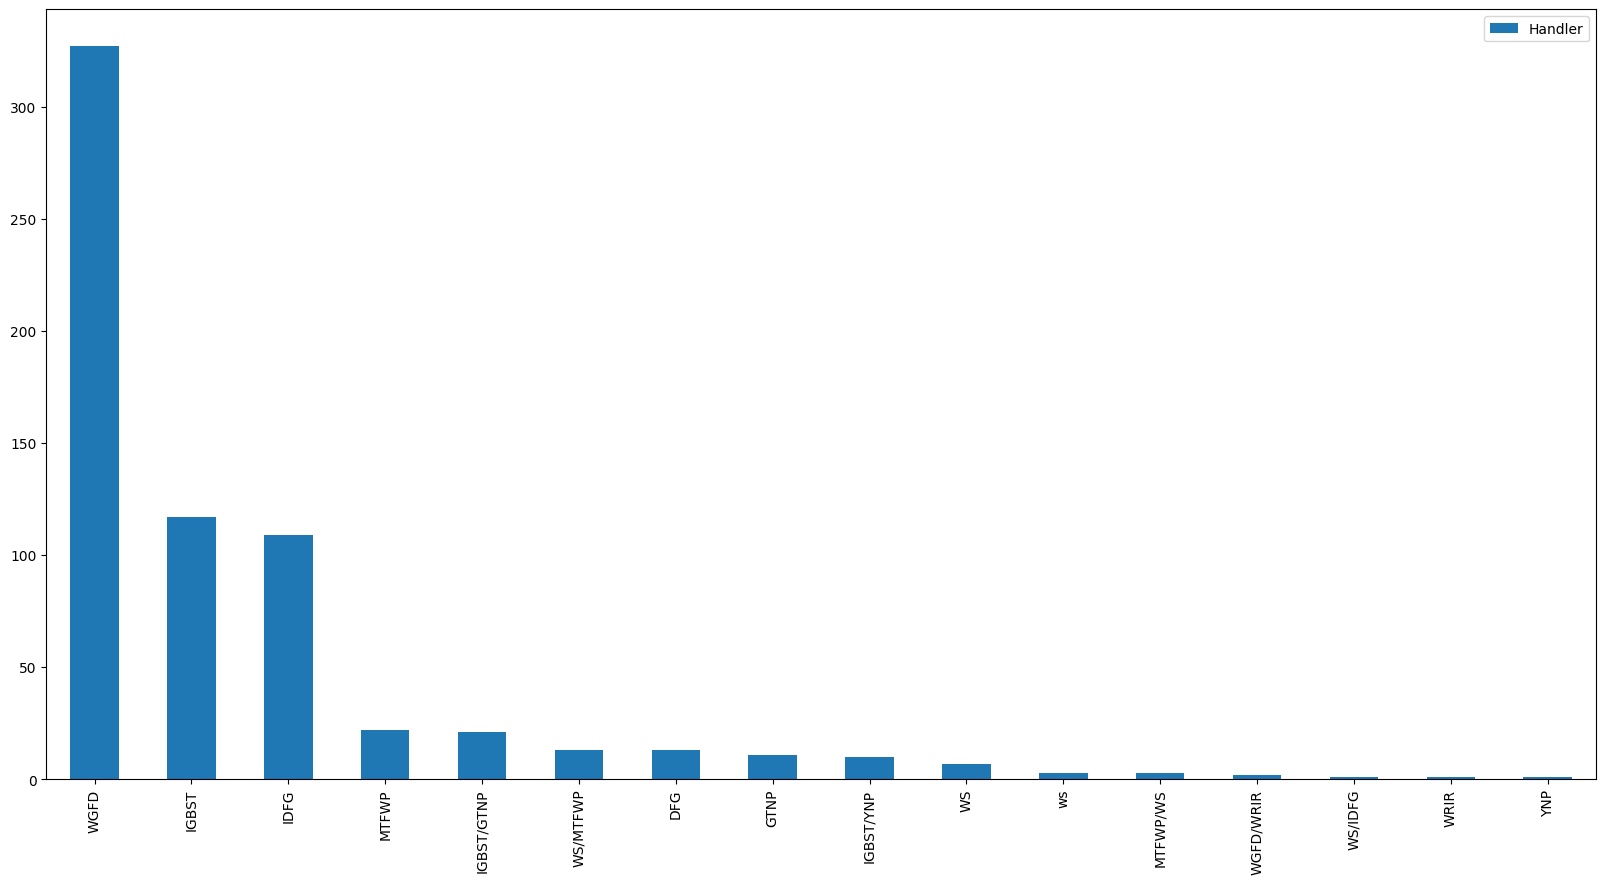

In [12]:
pd.DataFrame(bearCapture['Handler'].value_counts()).plot(kind='bar', figsize=(20,10))

In [13]:
pd.DataFrame(bearCapture['Handler'].value_counts())

,Handler
WGFD,327
IGBST,117
IDFG,109
MTFWP,22
IGBST/GTNP,21
WS/MTFWP,13
DFG,13
GTNP,11
IGBST/YNP,10
WS,7


We can see here that there are some handlers that are repeated becuase naming convetions have changed. 
i.e.
- WS/MFTWP and MTFWP/WS are the same, so we need to fix that in the data cleaning phase
- WS and ws are also the same
- And then we should verify YNP, WRIR, WS/IDFG
- We can see that WFGD (Wyoming Game and Fish Department) has the most captures

In [17]:
bearCapture[bearCapture['Handler']=='WRIR']

,Bear,Sex,Age,Date,General locationa,Capture type,Release Site,Handler,Year
509,Unm11,Female,Adult,8/9/18,"JK crk, WRIR",Management,Removed (201833),WRIR,2018


In [18]:
bearCapture[bearCapture['Handler']=='YNP']

,Bear,Sex,Age,Date,General locationa,Capture type,Release Site,Handler,Year
652,516,Male,Adult,10/2/17,"Oxbow Crk, YNP",Research,On site,YNP,2017
